<a href="https://colab.research.google.com/github/MGalal01/Machine-Learning-Galal/blob/main/timeseries_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install -q yfinance

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-12-15  196.606842  197.570007  198.399994  197.000000  197.529999   
2023-12-18  194.934998  195.889999  196.630005  194.389999  196.089996   
2023-12-19  195.979904  196.940002  196.949997  195.889999  196.160004   
2023-12-20  193.880188  194.830002  197.679993  194.830002  196.899994   
2023-12-21  193.730881  194.679993  197.080002  193.500000  196.100006   
2023-12-22  192.656174  193.600006  195.410004  192.970001  195.179993   
2023-12-26  192.108856  193.050003  193.889999  192.830002  193.610001   
2023-12-27  192.208374  193.149994  193.500000  191.089996  192.490005   
2023-12-28  192.636276  193.580002  194.660004  193.169998  194.139999   
2023-12-29  191.591370  192.529999  194.399994  191.729996  193.899994   

Price            Volume company_name Adj Close Close High  ...       Low Open  \
Ticker             AAPL                   GOOG  GOOG GOOG  ... MSFT MSFT MSFT   
Date                                                       ...                  
2023-12-15  128256700.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-18   55751900.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-19   40714100.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-20   52242800.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-21   46482500.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-22   37122800.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-26   28919300.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-27   48087700.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-28   34049900.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-29   42628800.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   

Price      Volume Adj Close Close High  Low Open Volume  
Ticker       MSFT      AMZN  AMZN AMZN AMZN AMZN   AMZN  
Date                                                     
2023-12-15    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-18    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-19    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-20    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-21    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-22    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-26    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-27    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-28    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-29    NaN       NaN   NaN  NaN  NaN  NaN    NaN  

[10 rows x 25 columns]

In [46]:
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,204.202559,204.677928,206.366813,202.766454,204.491514,5.710508e+07
std,23.834939,23.635493,23.733808,23.280854,23.500526,3.063086e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.811130e+07
25%,183.418907,184.199997,185.119995,182.180000,183.735001,4.187125e+07
50%,208.598785,209.070007,212.699997,206.589996,207.369995,4.970930e+07
75%,226.136200,226.384995,227.930000,223.959999,225.830002,6.295815e+07
max,248.130005,248.130005,250.800003,246.259995,247.960007,3.186799e+08


In [47]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-15 to 2024-12-13
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  251 non-null    float64
 1   (Close, AAPL)      251 non-null    float64
 2   (High, AAPL)       251 non-null    float64
 3   (Low, AAPL)        251 non-null    float64
 4   (Open, AAPL)       251 non-null    float64
 5   (Volume, AAPL)     251 non-null    int64  
 6   (company_name, )   251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


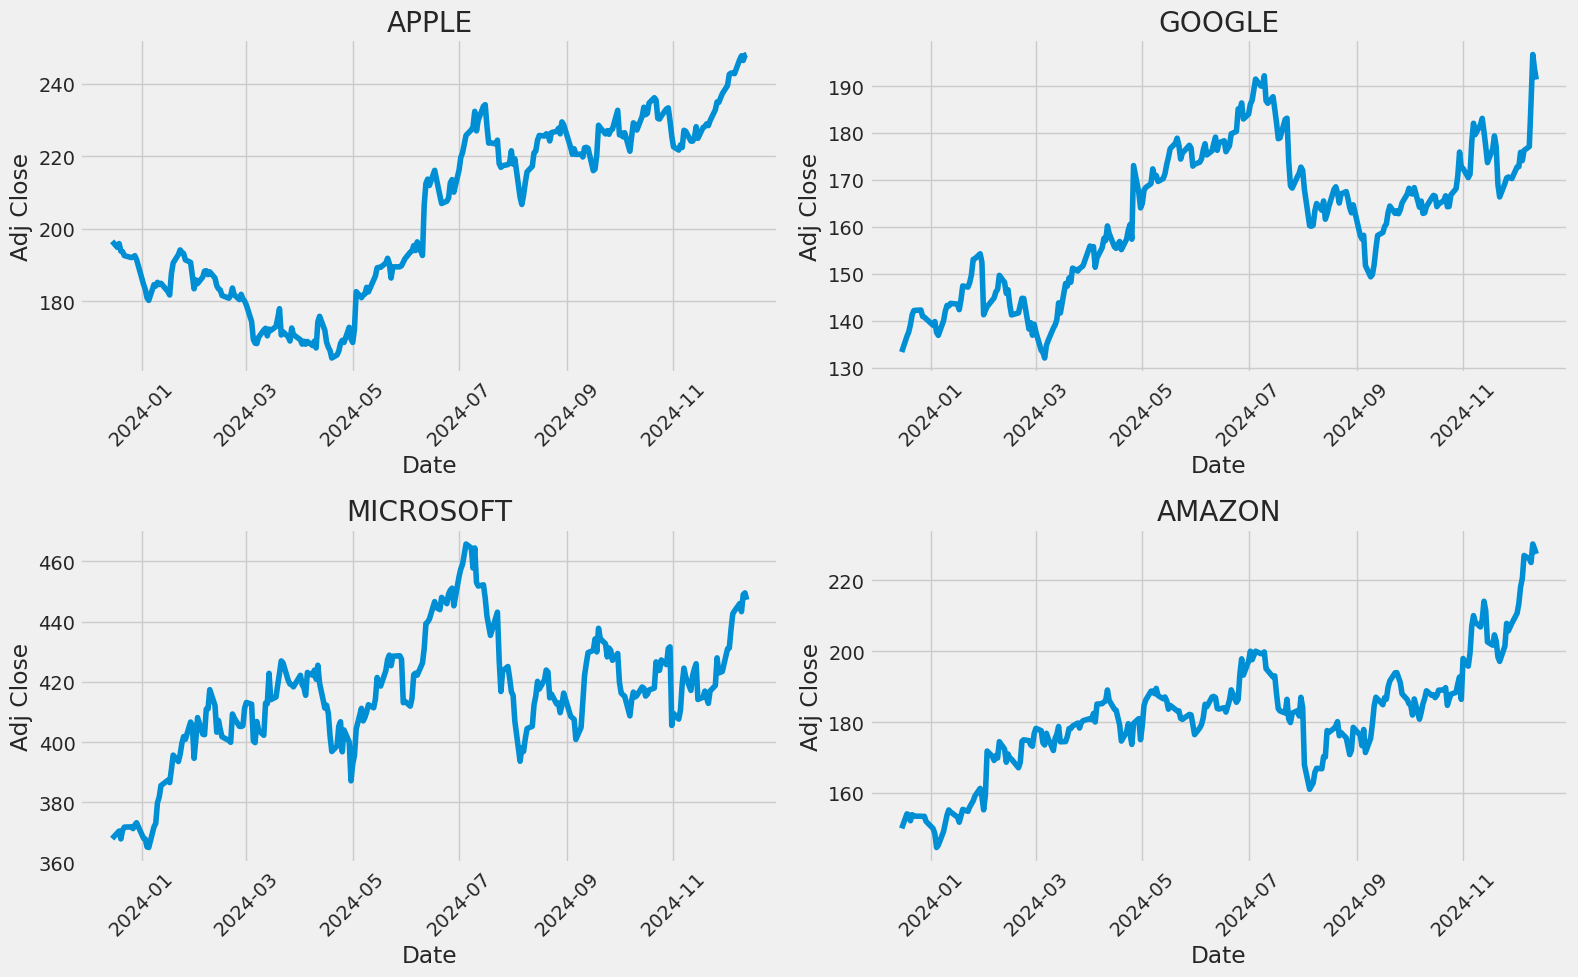

In [48]:
# prompt: generate a plot area has sub plots between closing price and the company name

plt.figure(figsize=(16, 10))

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i + 1)
    plt.plot(company['Adj Close'])
    plt.title(company_name[i])
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

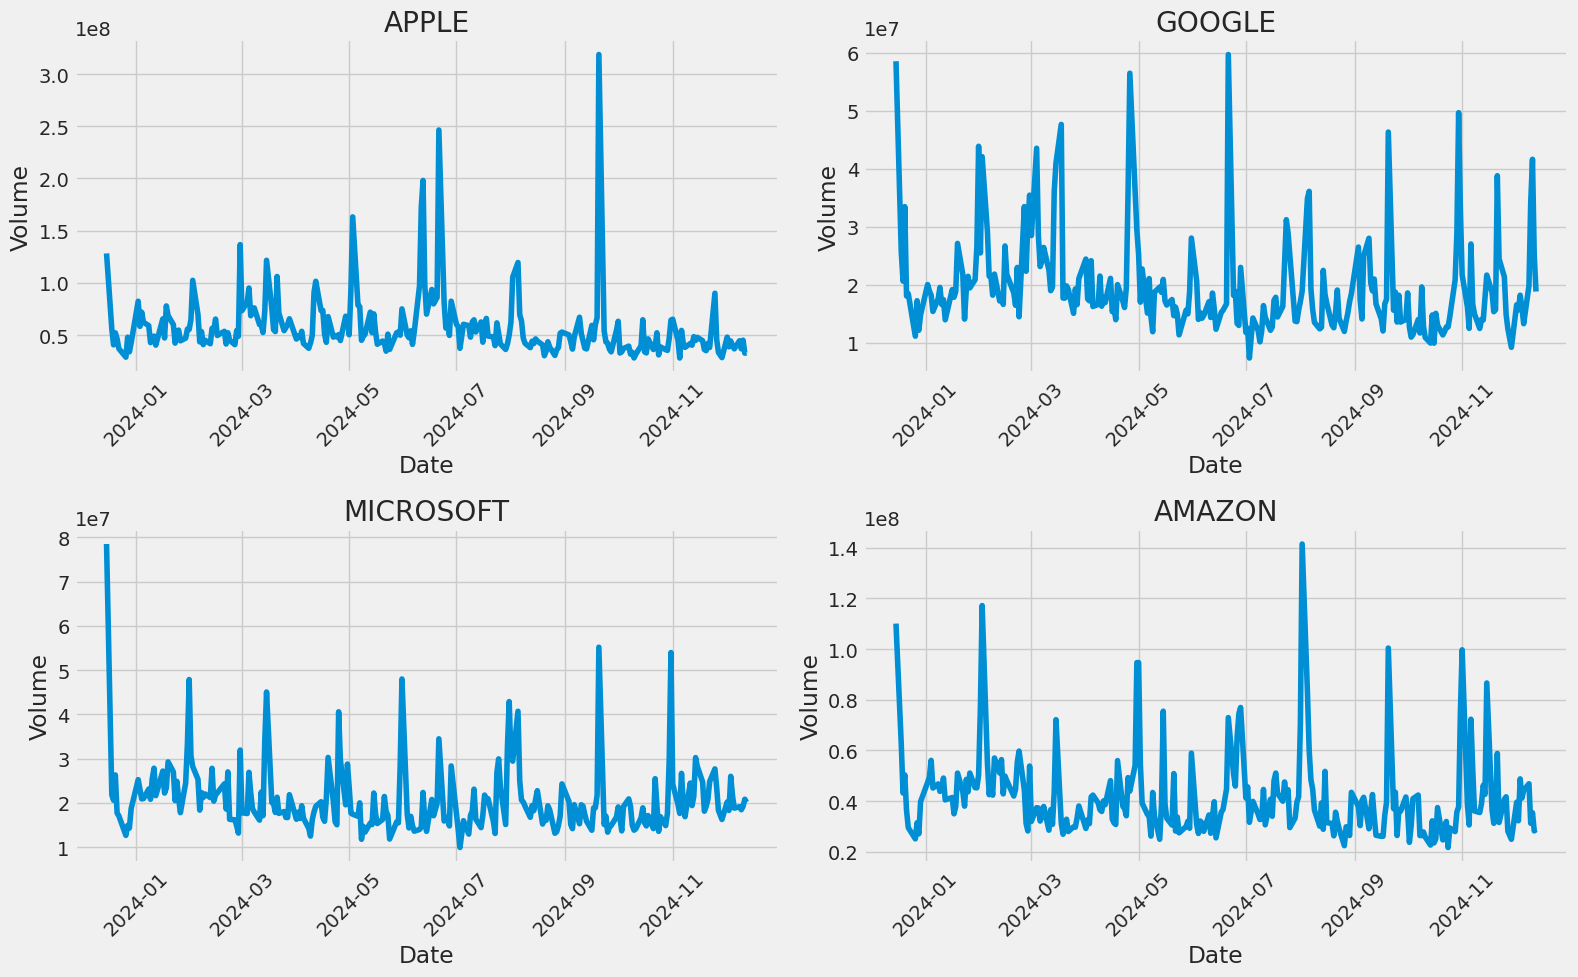

In [49]:
plt.figure(figsize=(16, 10))

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i + 1)
    plt.plot(company['Volume'])
    plt.title(company_name[i])
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

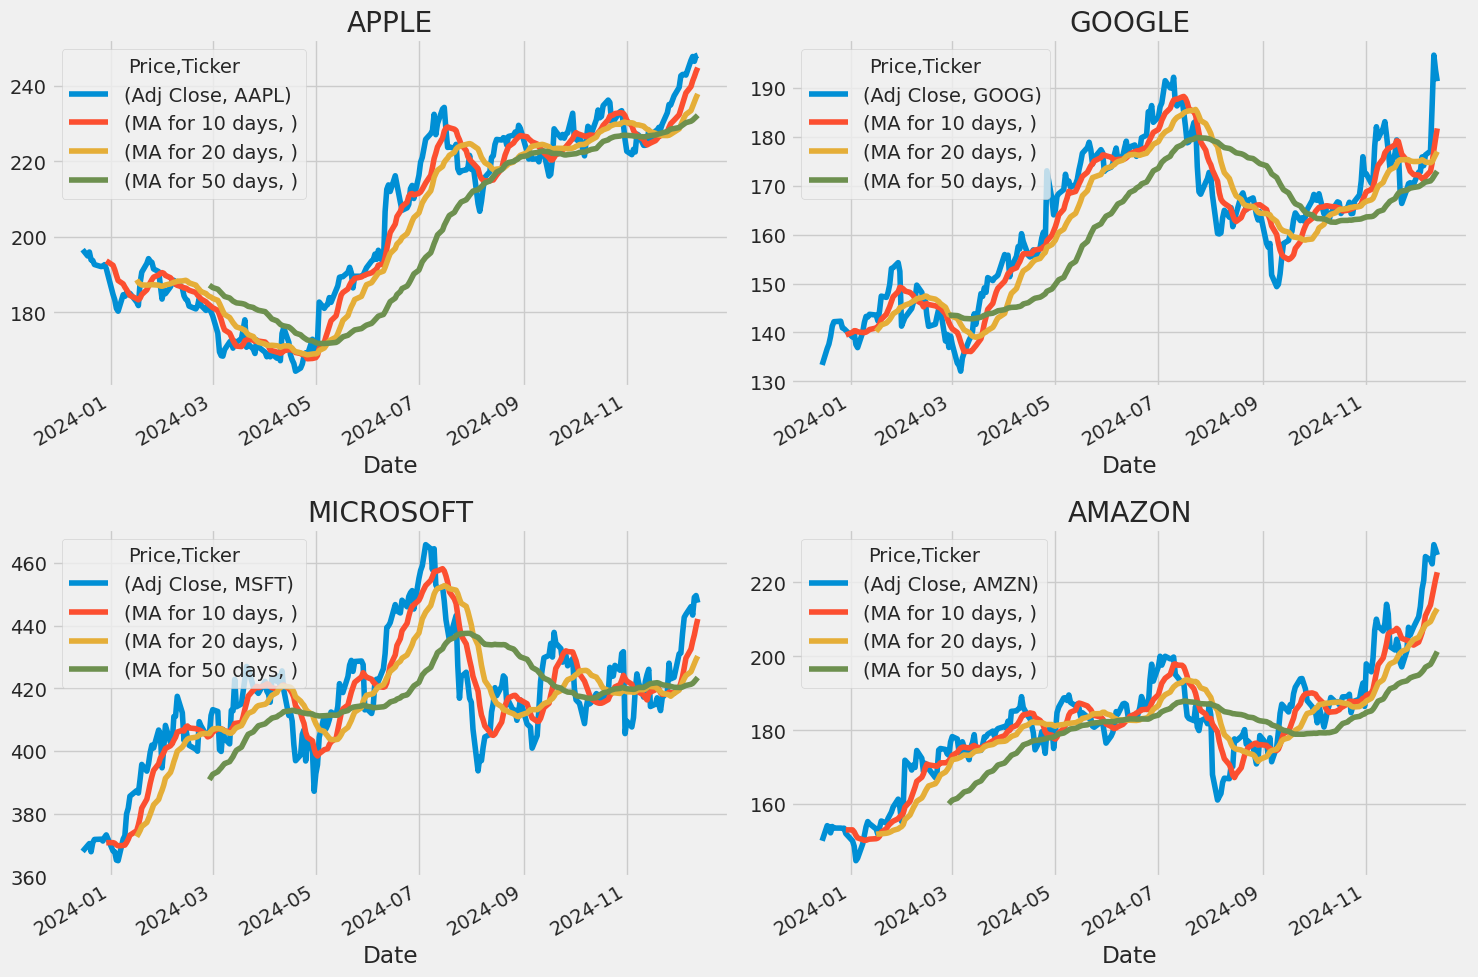

In [50]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


In [51]:
import matplotlib.pyplot as plt

# Assuming 'AAPL' is your DataFrame and it has a 'Date' and 'Adj Close' column
for company in company_list:
    adj_close_values = company['Adj Close']
    dates = company.index

    # Find dates where Adj Close values repeat within 3 months
    repeating_values = {}
    for i in range(len(adj_close_values)):
        # Use .iloc to access elements by their position
        current_value = adj_close_values.iloc[i]
        current_date = dates[i]

        for j in range(i + 1, len(adj_close_values)):
            # Use .iloc to access elements by their position
            # Comparing the values instead of Series
            # FIX: Use .item() to get a single value for comparison
            if adj_close_values.iloc[j].item() == current_value.item() and company.iloc[j]['company_name'].item() == company.iloc[i]['company_name'].item(): # Comparing the values instead of Series
                if (dates[j]-dates[i]).days <= 30 : # 1 month approx
                    # Change: Use current_value.item() as the key
                    if current_value.item() not in repeating_values:
                        repeating_values[current_value.item()] = [(current_date, dates[j])] # Store value instead of Series
                    else:
                        repeating_values[current_value.item()].append((current_date, dates[j])) # Store value instead of Series

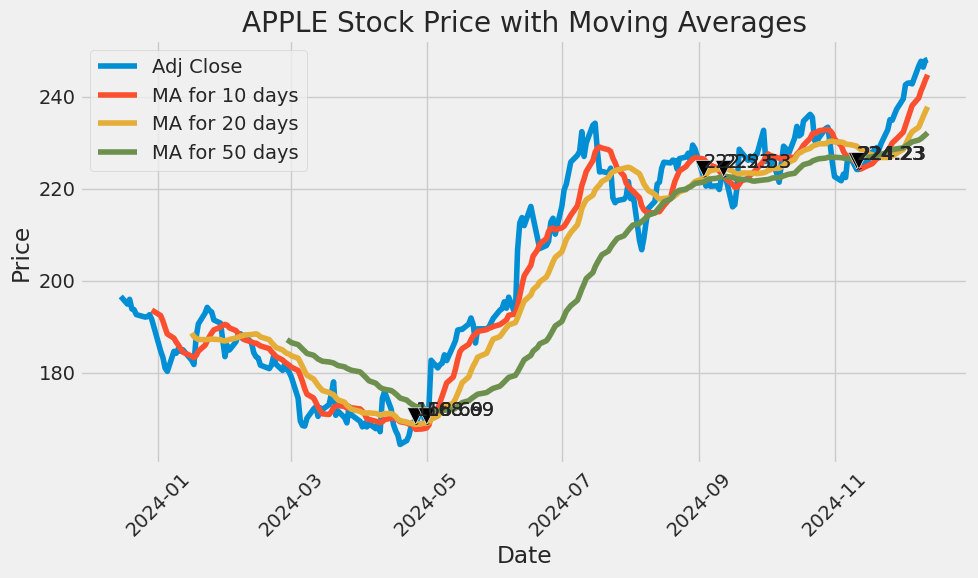

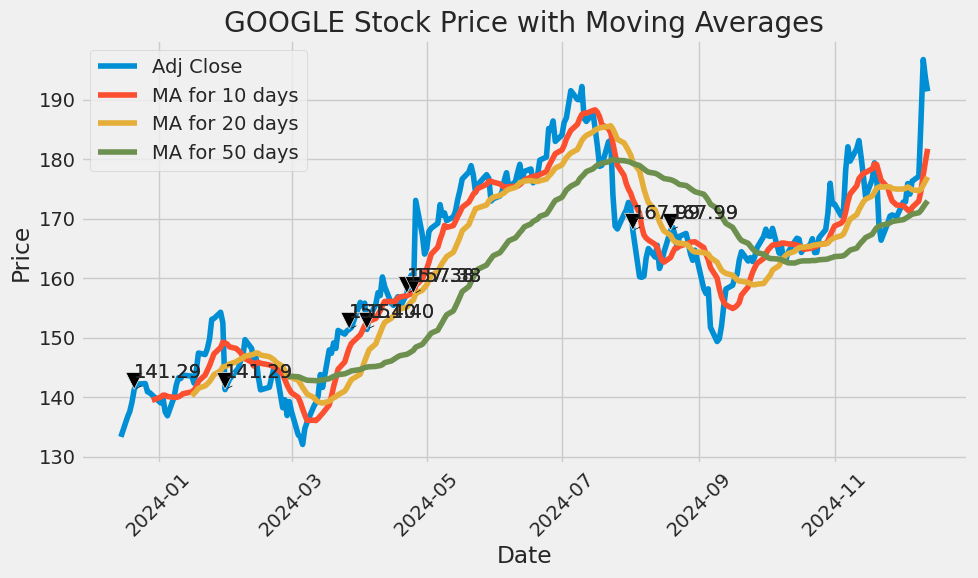

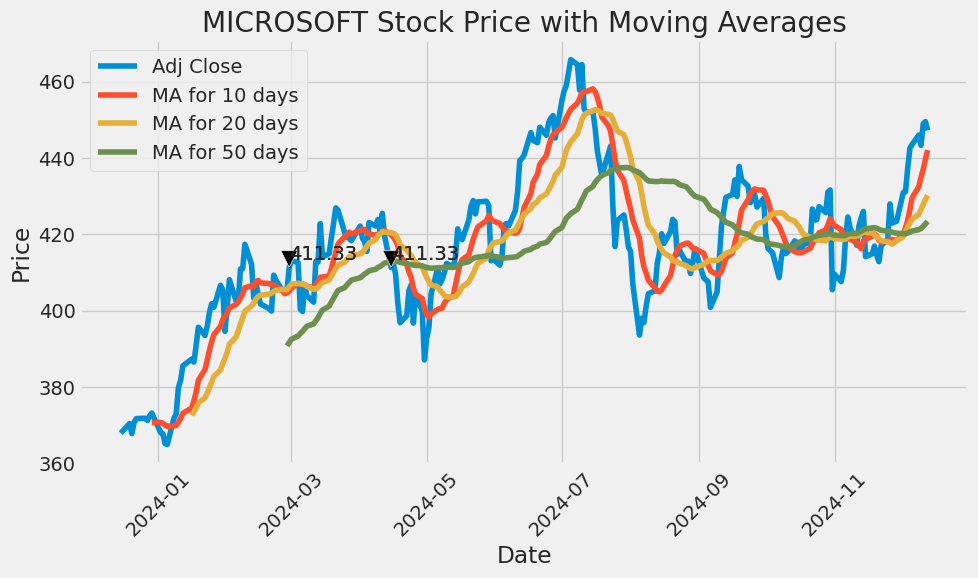

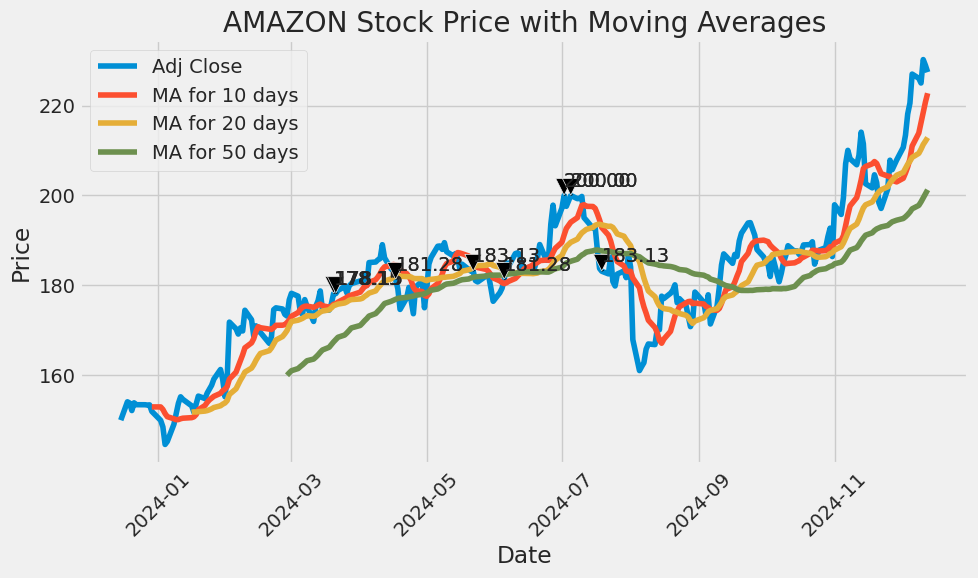

In [53]:
# prompt: plot the previous code on the same plot chart with the moving average

# Assuming 'AAPL' is your DataFrame and it has a 'Date' and 'Adj Close' column
for company in company_list:
    adj_close_values = company['Adj Close']
    dates = company.index

    # Find dates where Adj Close values repeat within 3 months
    repeating_values = {}
    for i in range(len(adj_close_values)):
        # Use .iloc to access elements by their position
        current_value = adj_close_values.iloc[i]
        current_date = dates[i]

        for j in range(i + 1, len(adj_close_values)):
            # Use .iloc to access elements by their position
            # Comparing the values instead of Series
            # FIX: Use .item() to get a single value for comparison
            if adj_close_values.iloc[j].item() == current_value.item() and company.iloc[j]['company_name'].item() == company.iloc[i]['company_name'].item(): # Comparing the values instead of Series
                if (dates[j]-dates[i]).days <= 90 : # 3 months approx
                    # Change: Use current_value.item() as the key
                    if current_value.item() not in repeating_values:
                        repeating_values[current_value.item()] = [(current_date, dates[j])] # Store value instead of Series
                    else:
                        repeating_values[current_value.item()].append((current_date, dates[j])) # Store value instead of Series

    plt.figure(figsize=(10, 6))
    plt.plot(company['Adj Close'], label='Adj Close')
    plt.plot(company['MA for 10 days'], label='MA for 10 days')
    plt.plot(company['MA for 20 days'], label='MA for 20 days')
    plt.plot(company['MA for 50 days'], label='MA for 50 days')
    plt.title(f'{company["company_name"].iloc[0]} Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Annotate repeating values
    for value, date_pairs in repeating_values.items():
        for start_date, end_date in date_pairs:
            plt.annotate(f'{value:.2f}', xy=(start_date, value), xytext=(start_date, value + 2),
                         arrowprops=dict(facecolor='black', shrink=0.05))
            plt.annotate(f'{value:.2f}', xy=(end_date, value), xytext=(end_date, value + 2),
                         arrowprops=dict(facecolor='black', shrink=0.05))
            plt.annotate(f'{value:.2f}', xy=(start_date, value), xytext=(start_date, value + 2),
                         arrowprops=dict(arrowstyle='-', color='black', linewidth=0.5)) # Added arrowstyle
            plt.annotate(f'{value:.2f}', xy=(end_date, value), xytext=(end_date, value + 2),
                         arrowprops=dict(arrowstyle='-', color='black', linewidth=0.5)) # Added arrowstyle

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [54]:
daily_return = (AAPL['Adj Close'] / AAPL['Adj Close'].shift(1)) - 1
daily_return.head()

Ticker,AAPL
Date,
2023-12-15,NaN
2023-12-18,-0.008503
2023-12-19,0.005360
2023-12-20,-0.010714
2023-12-21,-0.000770


In [55]:
# prompt: get the average of the daily return

print(f"Average Daily Return for AAPL: {daily_return.mean()}")


Average Daily Return for AAPL: Ticker
AAPL    0.001031
dtype: float64


In [56]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-12-15,NaN,NaN,NaN,NaN
2023-12-18,-0.008503,0.027339,0.025030,0.005179
2023-12-19,0.005360,-0.001817,0.006633,0.001637
2023-12-20,-0.010714,-0.010859,0.011296,-0.007073
2023-12-21,-0.000770,0.011307,0.015323,0.007879


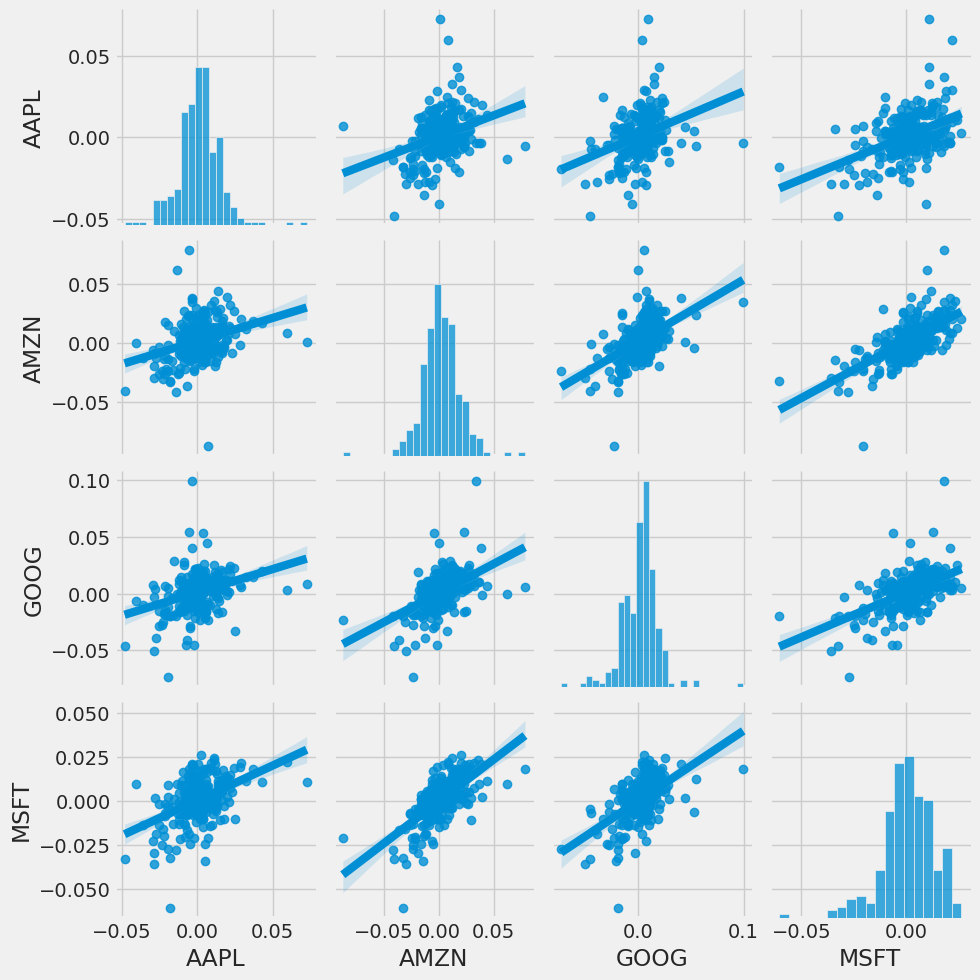

In [57]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock return')

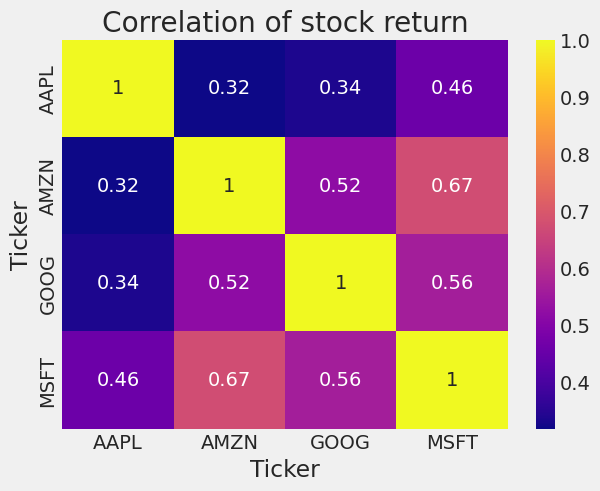

In [58]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='plasma')
plt.title('Correlation of stock return')

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0825 - val_loss: 0.2191
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0170 - val_loss: 0.0107
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0181 - val_loss: 0.0247
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0330 - val_loss: 0.0041
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0148 - val_loss: 0.0263
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0096 - val_loss: 0.0274
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0072 - val_loss: 0.0088
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0074 - val_loss: 0.0041
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0107 - val_loss: 0.0051
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0095 - val_loss: 0.0036
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0068 - val_loss: 0.0051
Epoch 12/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0056 - val_loss: 0.0036
Epoch 13/80

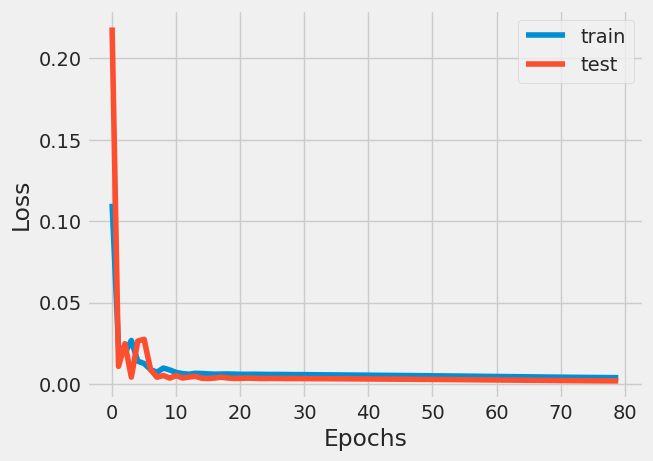

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

None
Train RMSE: 5.132175685823043
Test RMSE: 3.5632385062953578


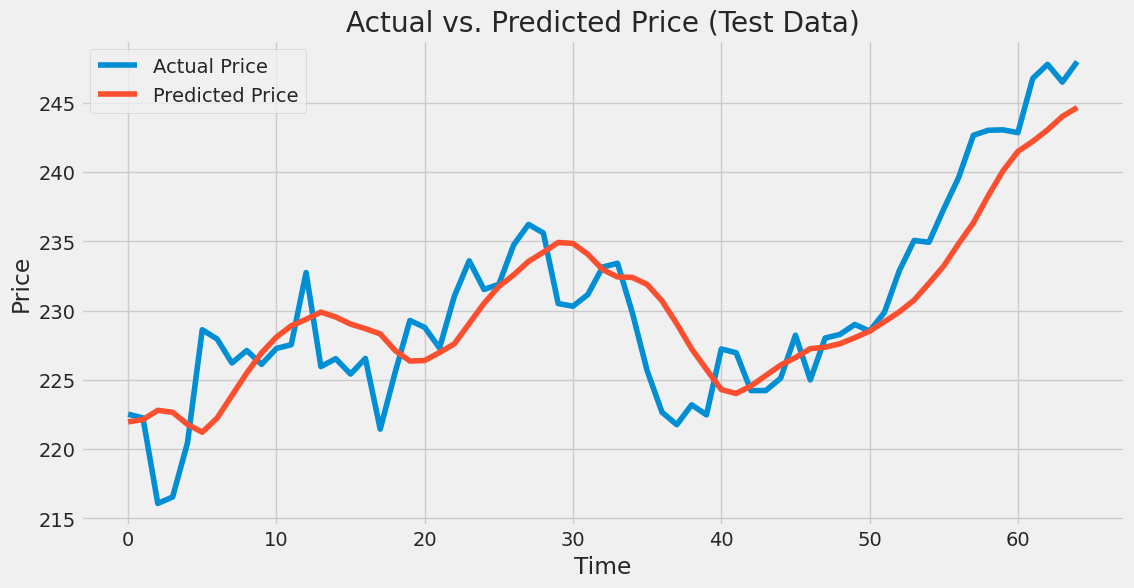

In [59]:
# prompt: create a tensor flow code and predict by using lstm model

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for LSTM
scaler = MinMaxScaler()
data = AAPL['Adj Close'].values.reshape(-1, 1)
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10  # Number of previous days to consider
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(X_train, Y_train, epochs=80, batch_size=50, validation_data = (X_test, Y_test),shuffle = False)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Example prediction (last data point in the test set)
last_ten_days = scaled_data[-look_back:]
last_ten_days = np.reshape(last_ten_days,(1,look_back, 1))
predicted_price = model.predict(last_ten_days)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted Price for next day: {predicted_price[0,0]}")
# plot history
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')     #validation/test loss
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

print(model.summary())

from sklearn.metrics import mean_squared_error
import math

# Calculate RMSE for training and testing sets
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(Y_test[0], label='Actual Price')
plt.plot(test_predict[:,0], label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price (Test Data)')
plt.legend()
plt.show()